This is the second assignment for DATA201. It is a continuation of the first one, with a more statistical focus.

In order to submit it, please use the http://apps.ecs.vuw.ac.nz/submit/DATA201 and submit only this single jupyter notebook with your code added into it at the appropriate places. 

The due date is Friday 5th April, before midnight. 

-Repeat of the information from last time

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >260 | >1200 | >50% |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

The four swimmabilities criteria in the columns of the table above each define a line in the ($\mu, \sigma$) plane. For example, the second (median) criterion is a straight line:

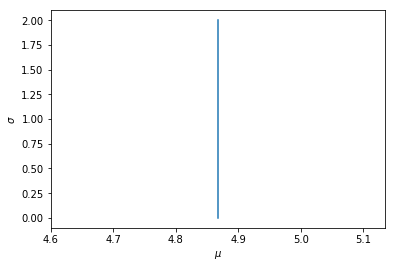

In [3]:
pl.plot([np.log(130),np.log(130)],[0,2])
pl.xlabel('$\mu$')
pl.ylabel('$\sigma$');

Read in the EColiHorizons dataset into the variable df again. You might find it helpful to make a column that is the log of the data. Then decide on the range that $\mu$ and $\sigma$ should take (by looking at the dataset) and plot the four lines on one plot. You can use the pandas where function to get the places where a condition is true, which will help you compute the percentages in the criteria. Then make another plot, and shade in the five parts of the space (categories A-E) in the appropriate colour. The next line might help you; the arguments are a list of x coordinates and then y coordinates in order around the shape. (3 marks)

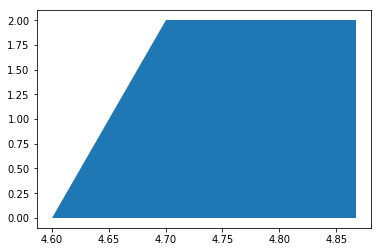

In [4]:
pl.fill([4.6,np.log(130),np.log(130),4.7],[0,0,2,2])

In [22]:
df = pd.read_csv('/home/marslast/Dropbox/Transfer/Teaching/DATA201/Datasets/EColiHorizons.csv')

In [23]:
df.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural


The Kolmogorov-Smirnov test checks how well some data fits a particular distribution. It is implemented in scipy as kstest, which is imported in the line below. Use it to test how well the log normal distribution assumption is fulfilled for the e-coli count of each of the 2 sites from last week. Using the help file, interpret the result.  (2 marks)

In [25]:
from scipy.stats import kstest
?kstest

In the previous assignment you computed the trend lines for two of the sites. Use the same sites, but fit linear models to the first half of the data (i.e., the first 5 years), and the second half. Use scipy.stats.pearsonr to decide if the trend is significant. (2 mark)

An alternative model is that the log data comes from a normal distribution of the form $N(\mu_0 + \mu_1 t, \sigma^2)$. In STAT193 you saw this written as $y = \alpha + \beta t$ (where $\alpha$ is the intercept and $\beta$ is the slope). Here the trend is $\mu_1$, so if $\mu_1=-0.05$ it would mean a 5% decrease per year in e-coli count. Fit this model and use it to decide if the two sites from last week are improving.  (2 marks)

Comment on whether or not you interpret this data as meaning that the state of our rivers is improving. (1 mark)